4окт23
# Начало matplotlib. Организация и визуализация данных.
* Как убрать строки с пустыми значениями?
* Как вывести хоть что-то?
* Какие бывают виды графиков?
* Ахахахаха, ящик с усами!
* Как сделать несколько графиков в одном выводе?

Сегодня тот самый день, когда мы наконец дошли до визуализации, которая позволит нам делать хоть какой-то анализ данных. Для этого нам понадобится библиотека matplotlib. Вот ее полная [документация](https://matplotlib.org/stable/users/index.html). Графики будем строить на примере такой таблицы.

In [1]:
# здесь я создаю синтетические данные
# это тебе учить не нужно
# но если прям интересно – я с радостью расскажу про каждую строчку по первой просьбе

from random import gauss, sample, choice
from pandas import DataFrame, Index, Series
from numpy import nan, array
from faker import Faker
fake = Faker()

N_ROWS = 1000
N_NANS = int(N_ROWS * gauss(0.15, 0.03))
JOBS_POPULARITY = [6, 4, 1, 2, 5, 3]

alph = list("QWERTYUIOPASDFGHJKLZXCVBNMqwertyuiopasdfghjklzxcvbnm1234567890")
body_mass_indexes = [gauss(23, 3) for i in range(N_ROWS)]

jobs = Series({"Software developer" : (0.9, 0.1), 
               "Full stack developer" : (1.1, 0.1), 
               "Project manager" : (1.1, 0.2), 
               "AI architect" : (1.2, 0.16), 
               "Data scientist" : (1.3, 0.2), 
               "Blockchain developer" : (1.1, 0.3)})

ids = [''.join(sample(alph, k=8, counts=[5] * (len(alph) - 10) + [11] * 10)) for i in range(N_ROWS)]
heights = [round(gauss(175, 13), 1) for i in range(N_ROWS)]
weights = [round(body_mass_indexes[i] * (heights[i] / 100) ** 2, 1) for i in range(N_ROWS)]
jobs_col = sample(list(jobs.index), k=N_ROWS, counts=map(int, array(JOBS_POPULARITY) * N_ROWS))

df = DataFrame({"name"   : [fake.name() for i in range(N_ROWS)],
                "birth" : [fake.date() for i in range(N_ROWS)],
                "height" : heights,
                "weight" : weights,
                "job"    : jobs_col,
                "salary" : [nan] * N_ROWS},
               index=ids)

nans = sample(list(df.index), k=N_NANS)

for i in df.index:
    df.at[i, "salary"] = int(gauss(100000, 5000) * gauss(jobs[df.at[i, "job"]][0], jobs[df.at[i, "job"]][1]))
    
    if i in nans:
        df.at[i, choice(df.columns)] = nan
    
    
df.head(10)

,name,birth,height,weight,job,salary
LyL9wNyf,Anthony Payne,1975-04-21,179.1,72.8,Full stack developer,132343.0
UWKaiSoO,Timothy Simmons,1998-01-23,177.9,NaN,Project manager,113810.0
9jW4GhXJ,Tamara Patel,2019-10-02,183.7,72.1,Full stack developer,116579.0
awdEBM1H,NaN,2002-12-14,201.3,108.1,Software developer,89335.0
ZsI9Rte9,Emma Johnson,1986-11-28,171.2,63.4,Software developer,83413.0
7X3sA62O,Patrick Taylor,2014-11-23,194.7,93.3,Software developer,108513.0
9zx4JQ98,Christina Hernandez,1971-12-24,191.5,101.8,AI architect,111334.0
fEfRSofC,Tiffany Blake,1977-06-08,191.6,NaN,Full stack developer,98270.0
5i2qINqm,Alexis Rodriguez,1998-11-23,164.3,74.6,Full stack developer,119928.0
k94KKQHI,Kathryn Adams,2020-05-12,170.4,72.9,Software developer,85875.0


Данные готовы, но в некоторых строках есть пустые значения. Я хочу, чтобы ты запомнил оба варианта решения этой проблемы.

### df.replace()
Заменяет значения на что-либо.

In [2]:
df.replace(nan, 0).head(5)

,name,birth,height,weight,job,salary
LyL9wNyf,Anthony Payne,1975-04-21,179.1,72.8,Full stack developer,132343.0
UWKaiSoO,Timothy Simmons,1998-01-23,177.9,0.0,Project manager,113810.0
9jW4GhXJ,Tamara Patel,2019-10-02,183.7,72.1,Full stack developer,116579.0
awdEBM1H,0,2002-12-14,201.3,108.1,Software developer,89335.0
ZsI9Rte9,Emma Johnson,1986-11-28,171.2,63.4,Software developer,83413.0


### df.dropna()
Удаляет строки с пустыми значениями. Им я в итоге и воспользуюсь.

In [3]:
df = df.dropna()
df.head(5)

,name,birth,height,weight,job,salary
LyL9wNyf,Anthony Payne,1975-04-21,179.1,72.8,Full stack developer,132343.0
9jW4GhXJ,Tamara Patel,2019-10-02,183.7,72.1,Full stack developer,116579.0
ZsI9Rte9,Emma Johnson,1986-11-28,171.2,63.4,Software developer,83413.0
7X3sA62O,Patrick Taylor,2014-11-23,194.7,93.3,Software developer,108513.0
9zx4JQ98,Christina Hernandez,1971-12-24,191.5,101.8,AI architect,111334.0


## Scatter
Документация по [ссылке](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

<IPython.core.display.Javascript object>


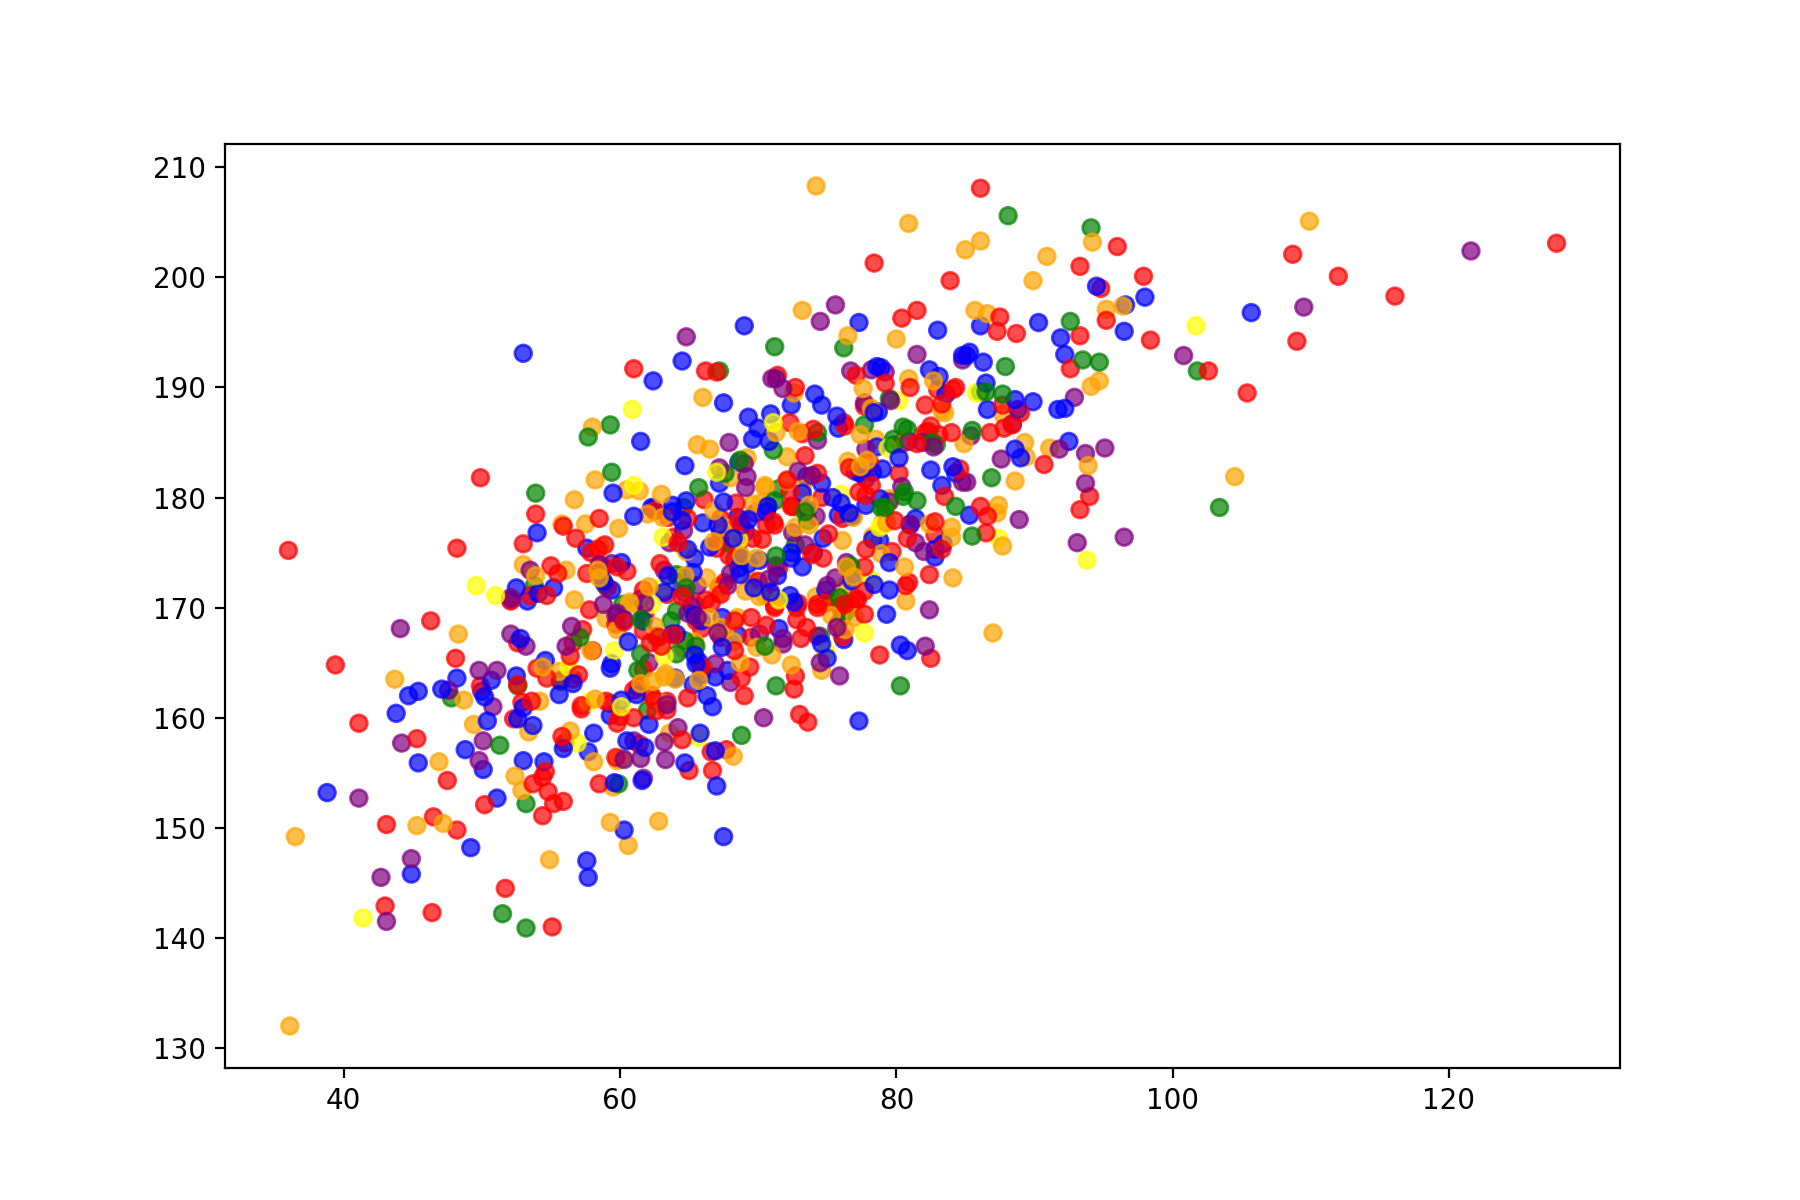

In [4]:
# импортирую библиотеку
from matplotlib import pyplot as plt

# эта строчка сделает графики более симпатичными и интерактивными
%matplotlib notebook

# создаю массив цветов
jobs_colors = Series({"Software developer" : "red", 
                      "Full stack developer" : "orange", 
                      "Project manager" : "yellow", 
                      "AI architect" : "green", 
                      "Data scientist" : "blue", 
                      "Blockchain developer" : "purple"})

# создание полотна и задание размеров
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)


# конкретно эта строчка создает график
ax.scatter(x=df["weight"], y=df["height"], c=jobs_colors[df["job"]], alpha=0.7)

# x и y это координаты данных по осям
# с – цвет
# alpha – степень прозрачности

# эта строчка выводит созданный график
plt.show()

По этому графику можно сказать, что более высокие люди – больше весят. При этом зависимости между профессией и ростом или профессией и весом – нет.

## Bar
Да, название забавное, но то ли еще будет. Документация по [ссылке](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py).

In [5]:
# сейчас буду пользоваться тем,
# что мы можем посчитать количество значений в столбце
jobs_counts = df["job"].value_counts().sort_index()
jobs_counts

job
AI architect             82
Blockchain developer    120
Data scientist          208
Full stack developer    170
Project manager          32
Software developer      251
Name: count, dtype: int64

<IPython.core.display.Javascript object>


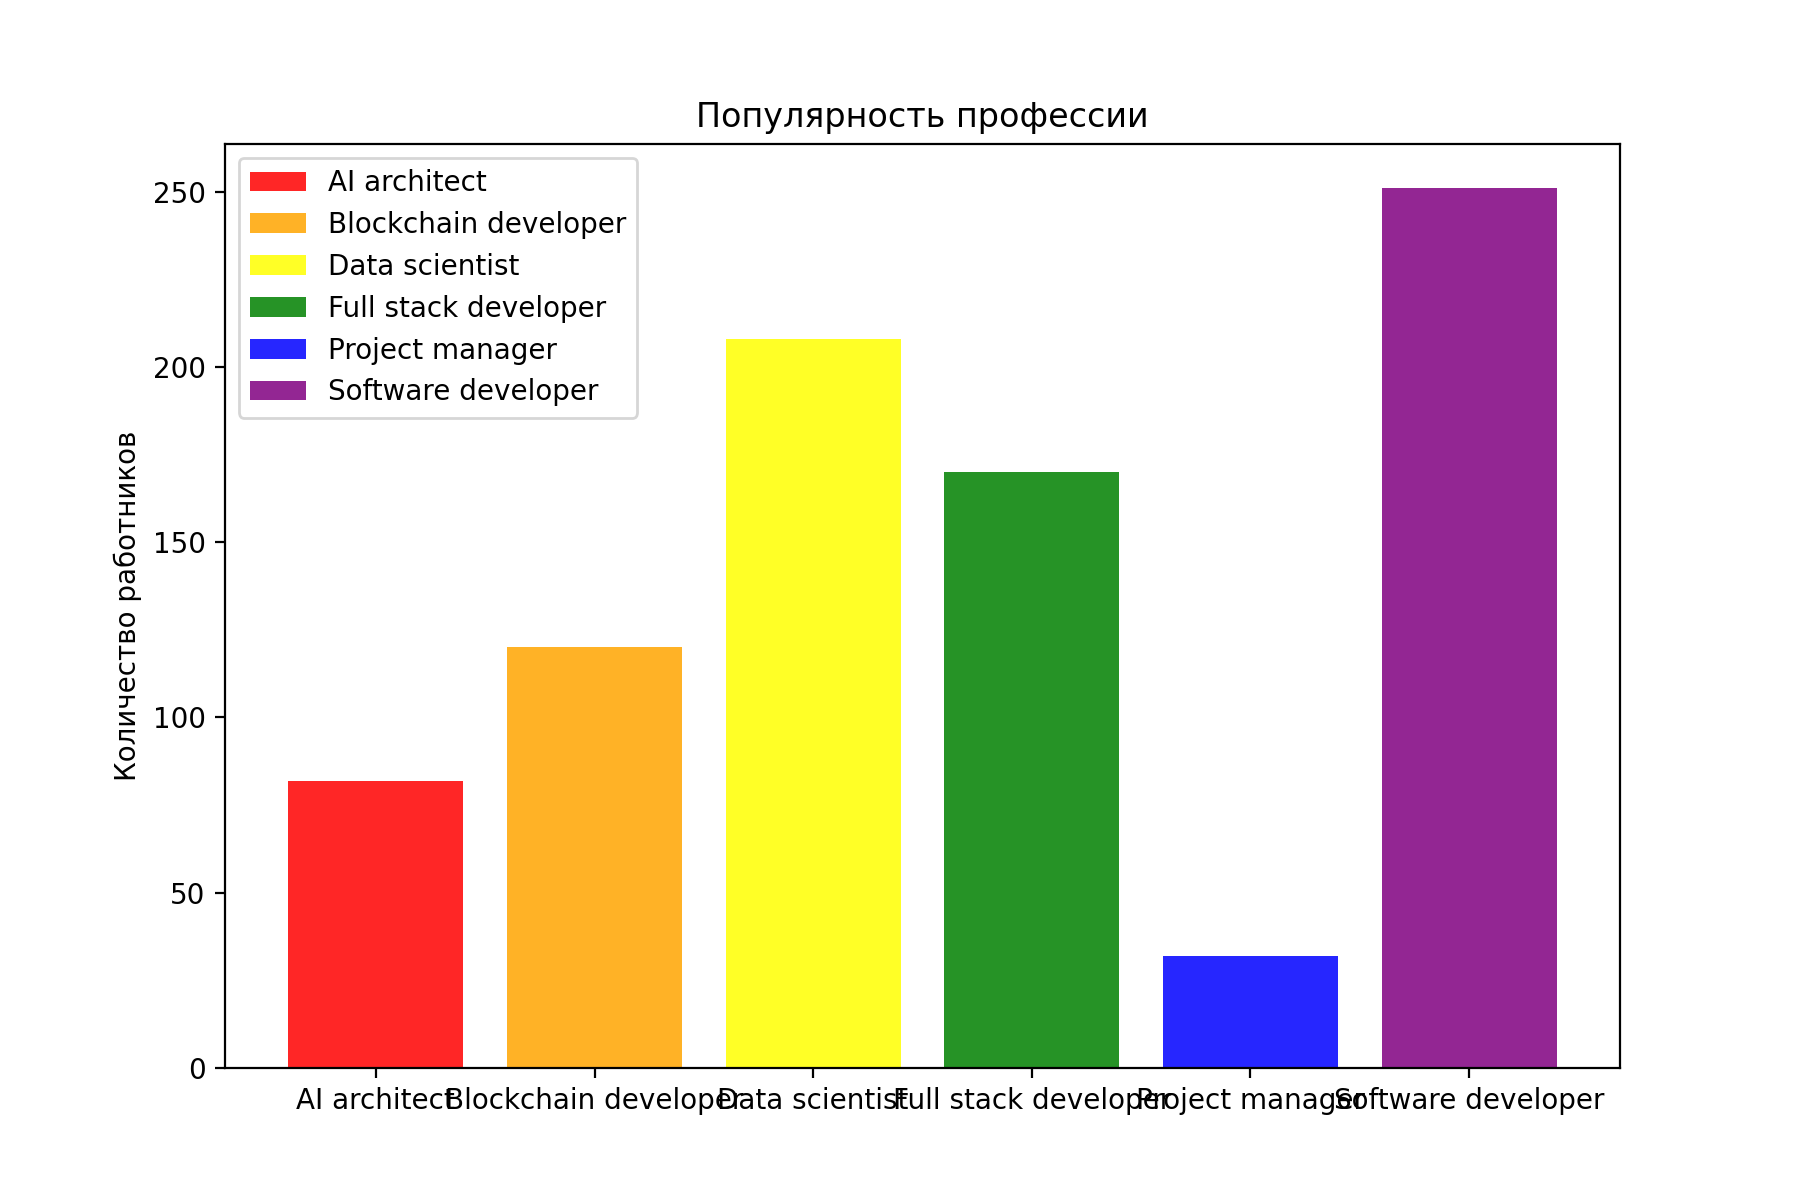

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

bars = ax.bar(jobs_counts.index,
              jobs_counts.values,
              color=jobs_colors,
              alpha=0.85)

# так можно расставить надписи и легенду, дальше еще об этом напишу
# просто именно у барплота очень странно делается легенда, у остальных – по другому
ax.set_ylabel("Количество работников")
ax.set_title("Популярность профессии")
ax.legend(bars, jobs_counts.index, loc="upper left")

plt.show()

По этому графику очень заметна разница в количестве работников в разных профессиях. Больше всего разработчиков софта, меньше всего руководителей проектов.

## Box
Его альтернативное название "ящик с усами" мне нравится куда больше. Вот его [документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Чтобы получить ящик с усами, сначала нужно подготовить данные. Я хочу, чтобы ящик с усами показывал зарплаты внутри каждой профессии, А значит нужно собрать двумерный массив, где в разных строках будут зарплаты разных профессий.

In [7]:
# сначала я пытался сделать так, нашел интересность
jobs_ser = Series([[]] * jobs.size)
jobs_ser.index = jobs.index

for i in df.head(10).index:
    jobs_ser[df.at[i, "job"]].append(df.at[i, "salary"])

jobs_ser

Software developer      [132343.0, 116579.0, 83413.0, 108513.0, 111334...
Full stack developer    [132343.0, 116579.0, 83413.0, 108513.0, 111334...
Project manager         [132343.0, 116579.0, 83413.0, 108513.0, 111334...
AI architect            [132343.0, 116579.0, 83413.0, 108513.0, 111334...
Data scientist          [132343.0, 116579.0, 83413.0, 108513.0, 111334...
Blockchain developer    [132343.0, 116579.0, 83413.0, 108513.0, 111334...
dtype: object

Это о себе говорит С++, на котором написан python, потому что при создании двумерного массива таком способом:
```python
[[]] * jobs.size
```
– мы получаем просто несколько ссылок на один и тот же массив, поэтому меняться они будут одновременно. При добавлении элемента в один из внутренних списков, мы добавим этот элемент во все вложенные списки.

In [8]:
# правильно будет вот так
jobs_ser = Series([[] for i in range(jobs.size)])
jobs_ser.index = jobs.index
jobs_ser = jobs_ser.sort_index()

for i in df.index:
    jobs_ser[df.at[i, "job"]].append(df.at[i, "salary"])

jobs_ser

AI architect            [111334.0, 140843.0, 106771.0, 110505.0, 11457...
Blockchain developer    [110971.0, 93419.0, 66616.0, 119362.0, 120784....
Data scientist          [160120.0, 137730.0, 145490.0, 153664.0, 13283...
Full stack developer    [132343.0, 116579.0, 119928.0, 119418.0, 12095...
Project manager         [134765.0, 124365.0, 111895.0, 92431.0, 137796...
Software developer      [83413.0, 108513.0, 85875.0, 90192.0, 75482.0,...
dtype: object

Теперь можно строить ящик с усами!

<IPython.core.display.Javascript object>


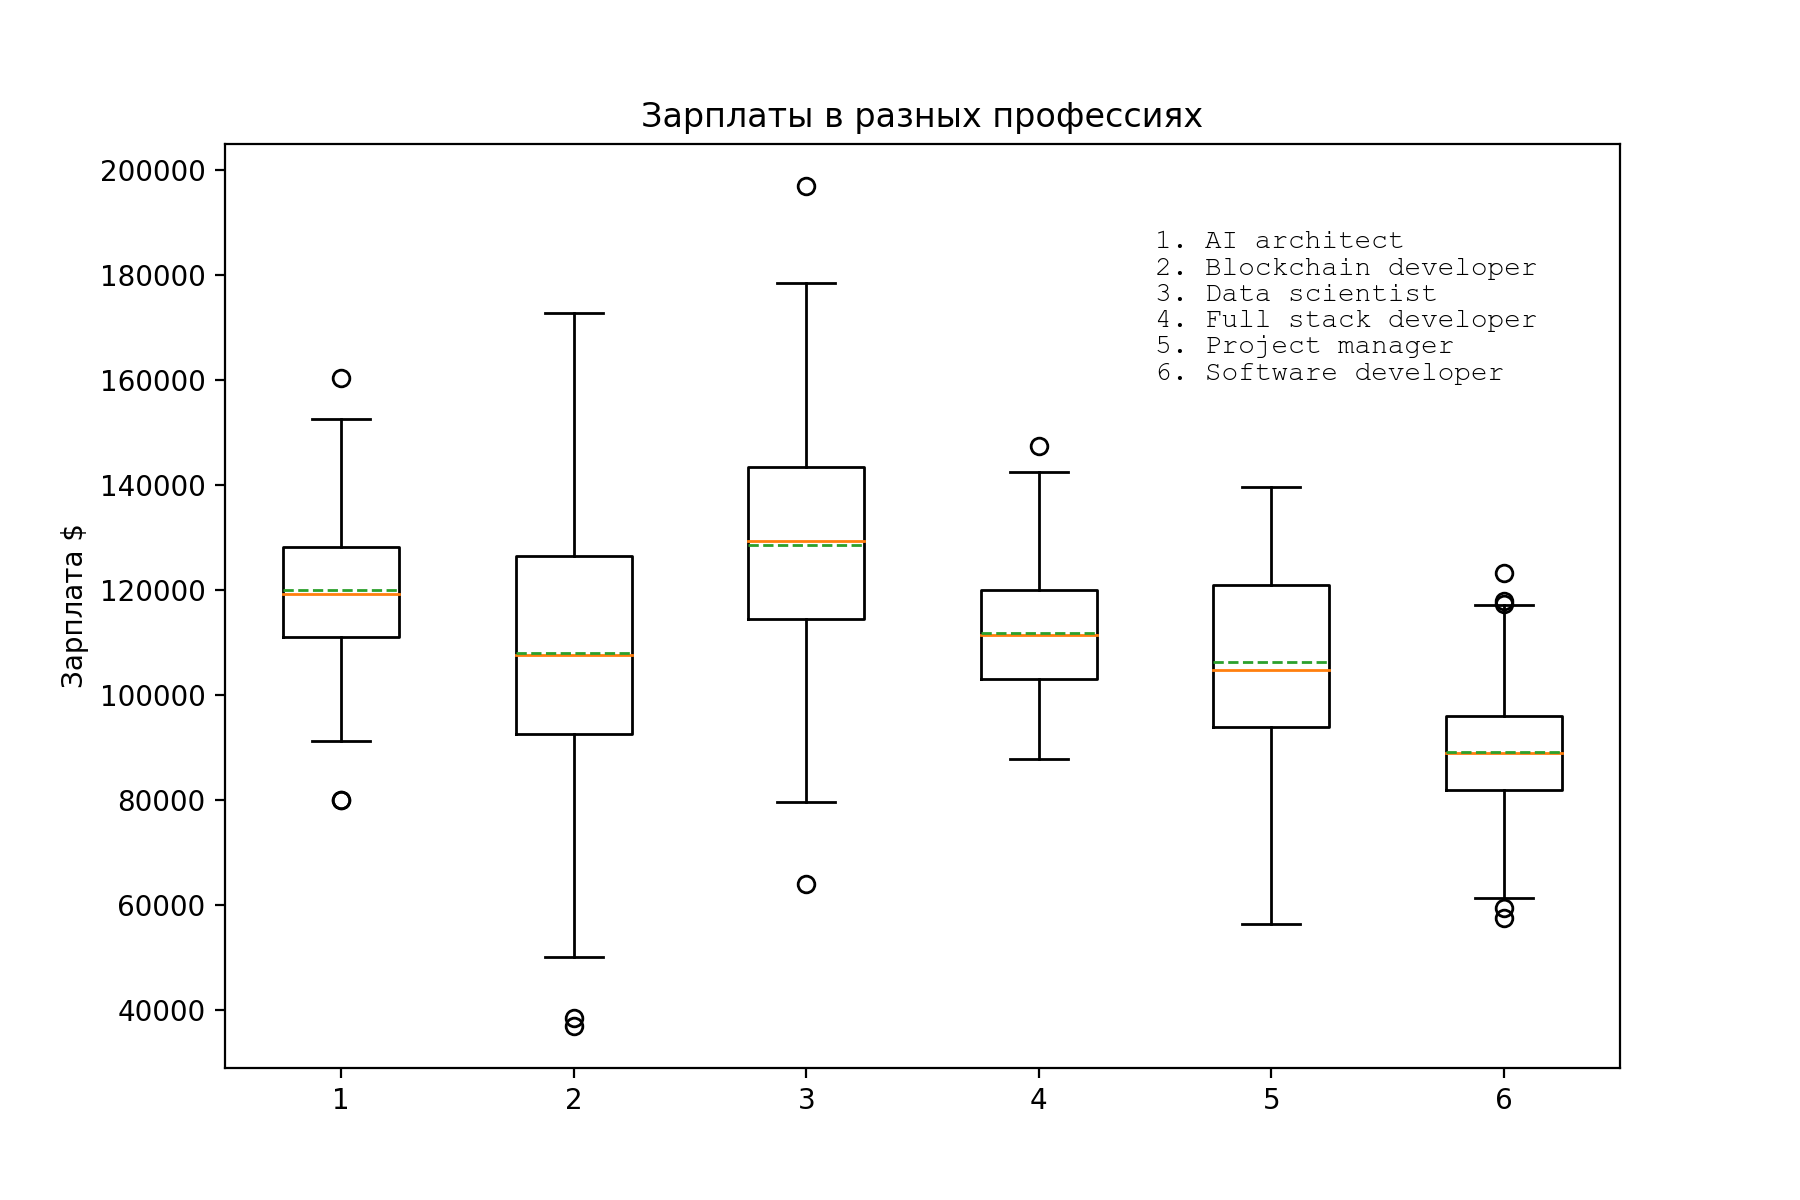

In [9]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

ax.boxplot(jobs_ser.values, showmeans=True, meanline=True)

ax.set_ylabel("Зарплата $")
ax.set_title("Зарплаты в разных профессиях")

# так можно расположить текст на графике
for i in range(jobs_ser.size):
    plt.text(4.5, 185000 - 5000 * i, str(i + 1) + ". " + jobs_ser.index[i], family='Courier New')

plt.show()

Зеленая линия – медиана, оранжевая – среднее. По этому графику видно, что Data Scientist зарабатывает заметно больше остальных, но у него большой разброс. У Full Stack разработчика средняя зарплата больше 100k, а разброс маленький.

## Pie

График печеньки или график пирога, рисунок на котором большинство из нас учили дроби. Вот его [документация](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html). Все данные уже готовы, так что можно строить.

<IPython.core.display.Javascript object>


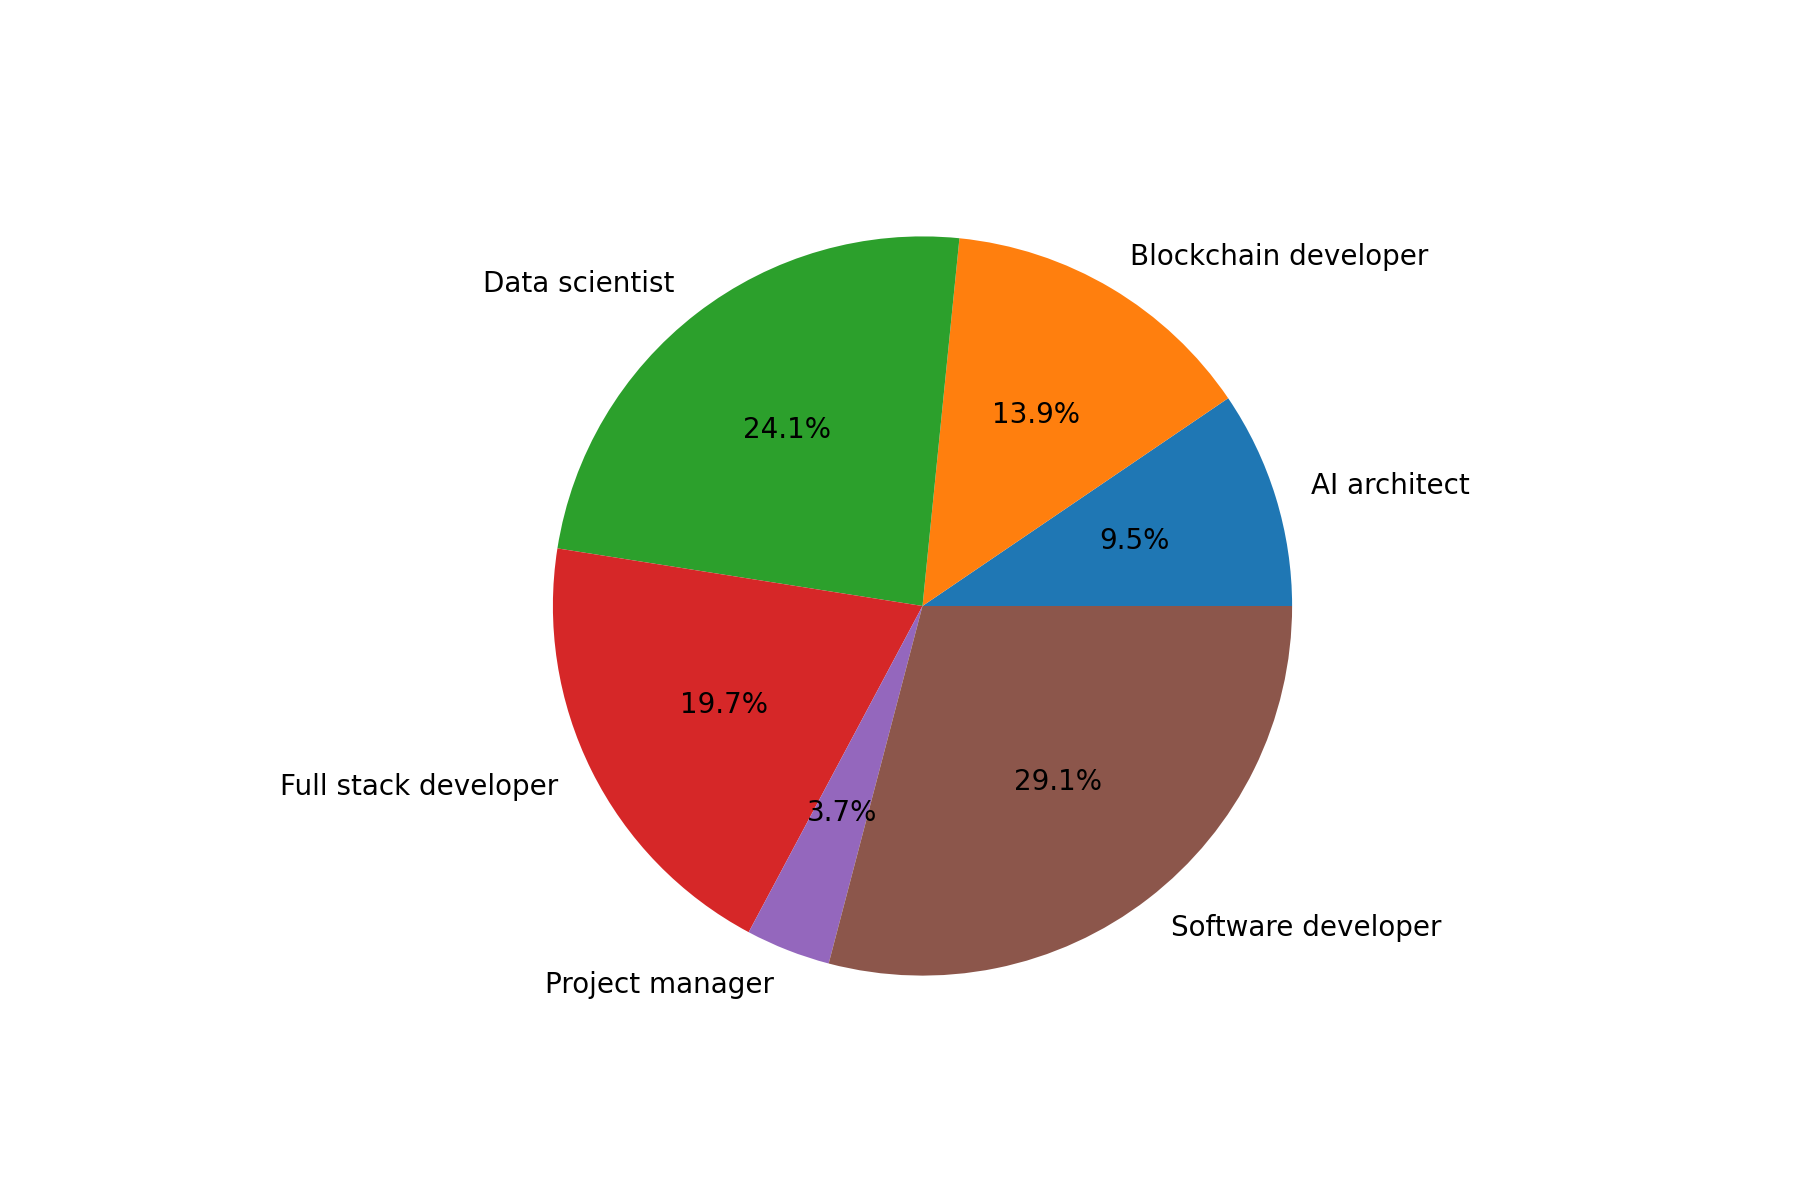

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

# третий параметр указывает, что я хочу видеть подпись о конкретных процентных значениях
ax.pie(jobs_counts.values, labels=jobs_counts.index, autopct='%1.1f%%')
plt.show()

В этом случае этот график дает примерно ту же информацию, что и bar plot. Очень наглядная диаграмма – хорошо понятно, кого больше, кого меньше.

При подготовке в уроку я узнал, что в новую версию matplotlib добавили паттерны, которые можно добавлять на график. Вот [документация](https://matplotlib.org/stable/gallery/shapes_and_collections/hatch_style_reference.html) и пример графика. Как по мне, выглядит стильно.

<IPython.core.display.Javascript object>


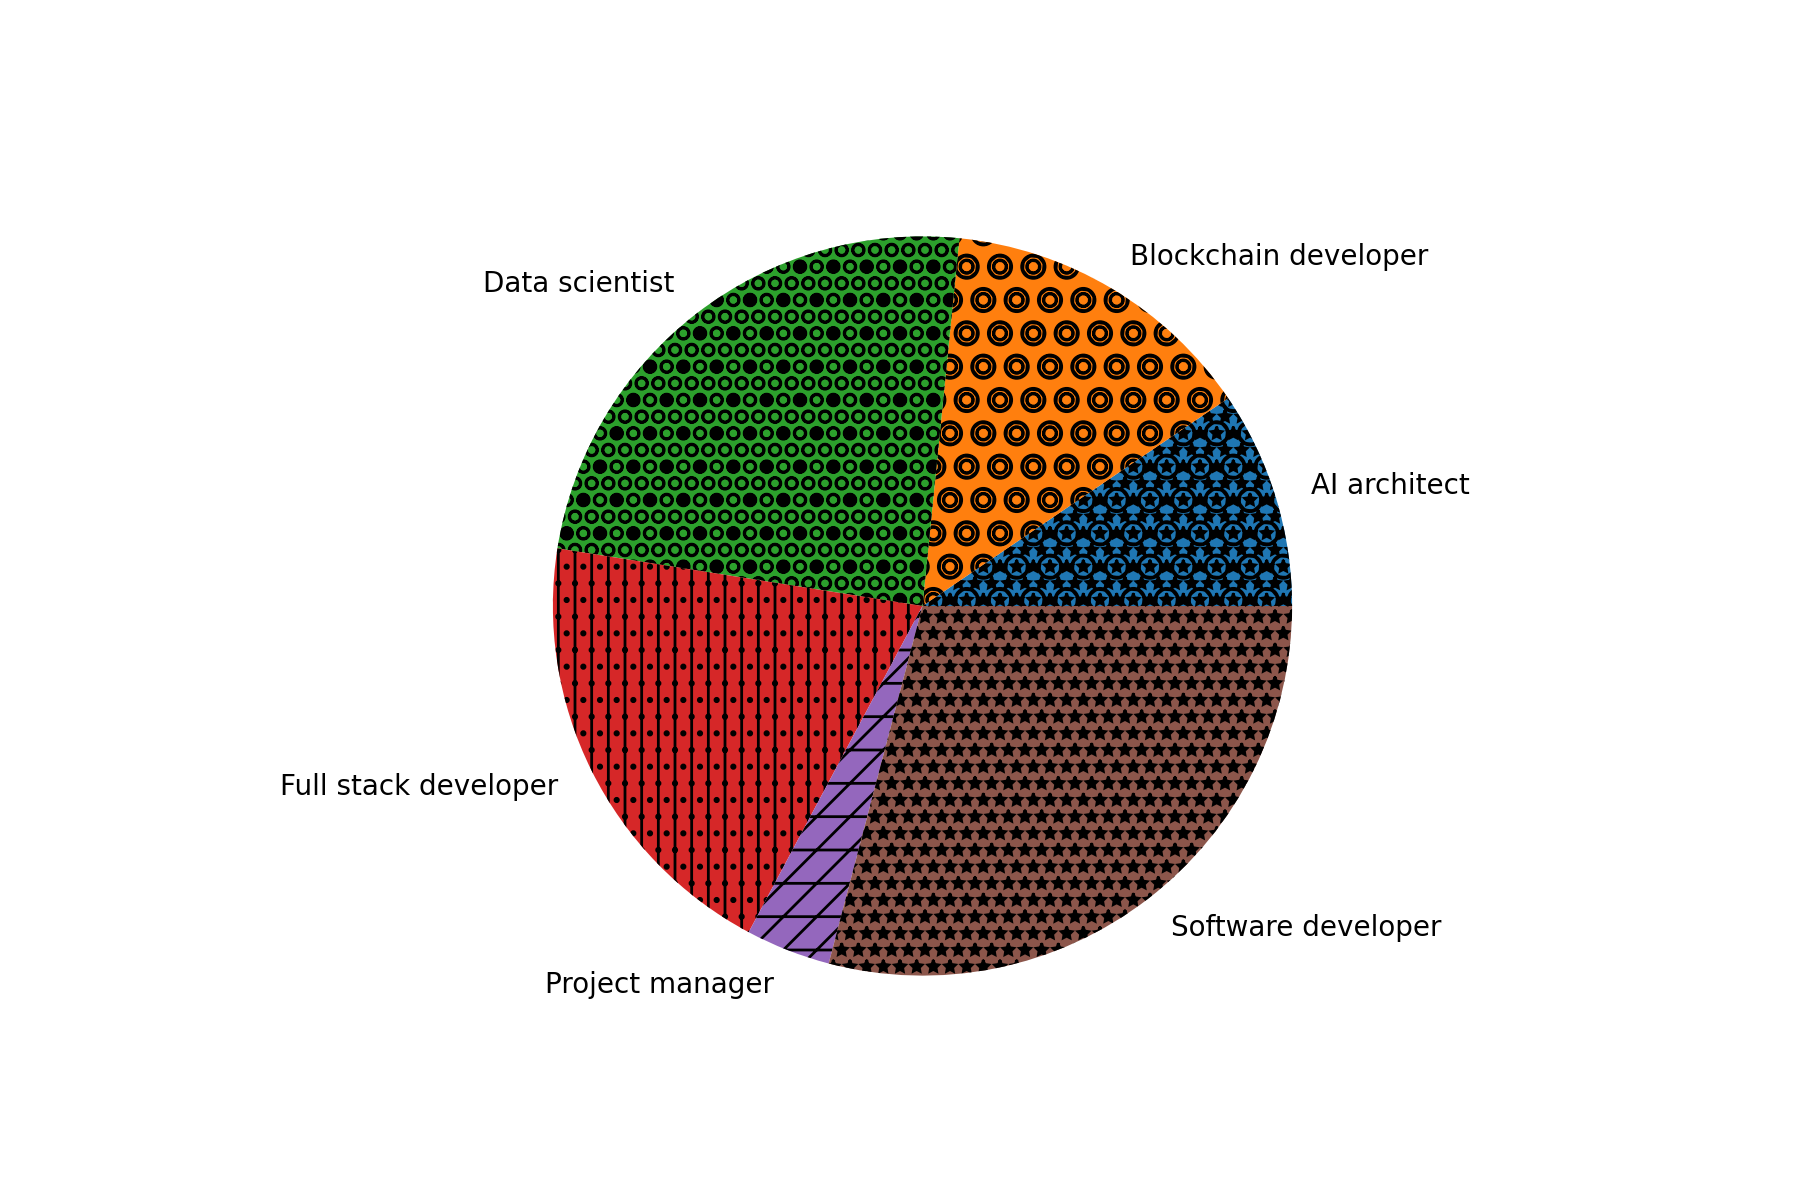

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(9)
fig.set_figheight(6)

# третий параметр как раз и создает эти паттерны
ax.pie(jobs_counts.values, labels=jobs_counts.index, hatch=['**O', 'oO', 'O.O', '.||.', '-//', '**'])
plt.show()

## Несколько графиков в одном выводе
Именно для этого все это время использовалась функция *subplots()*. Обращение к конкретному графику идет по индексам. Первый индекс – строки, второй – столбца.

<IPython.core.display.Javascript object>


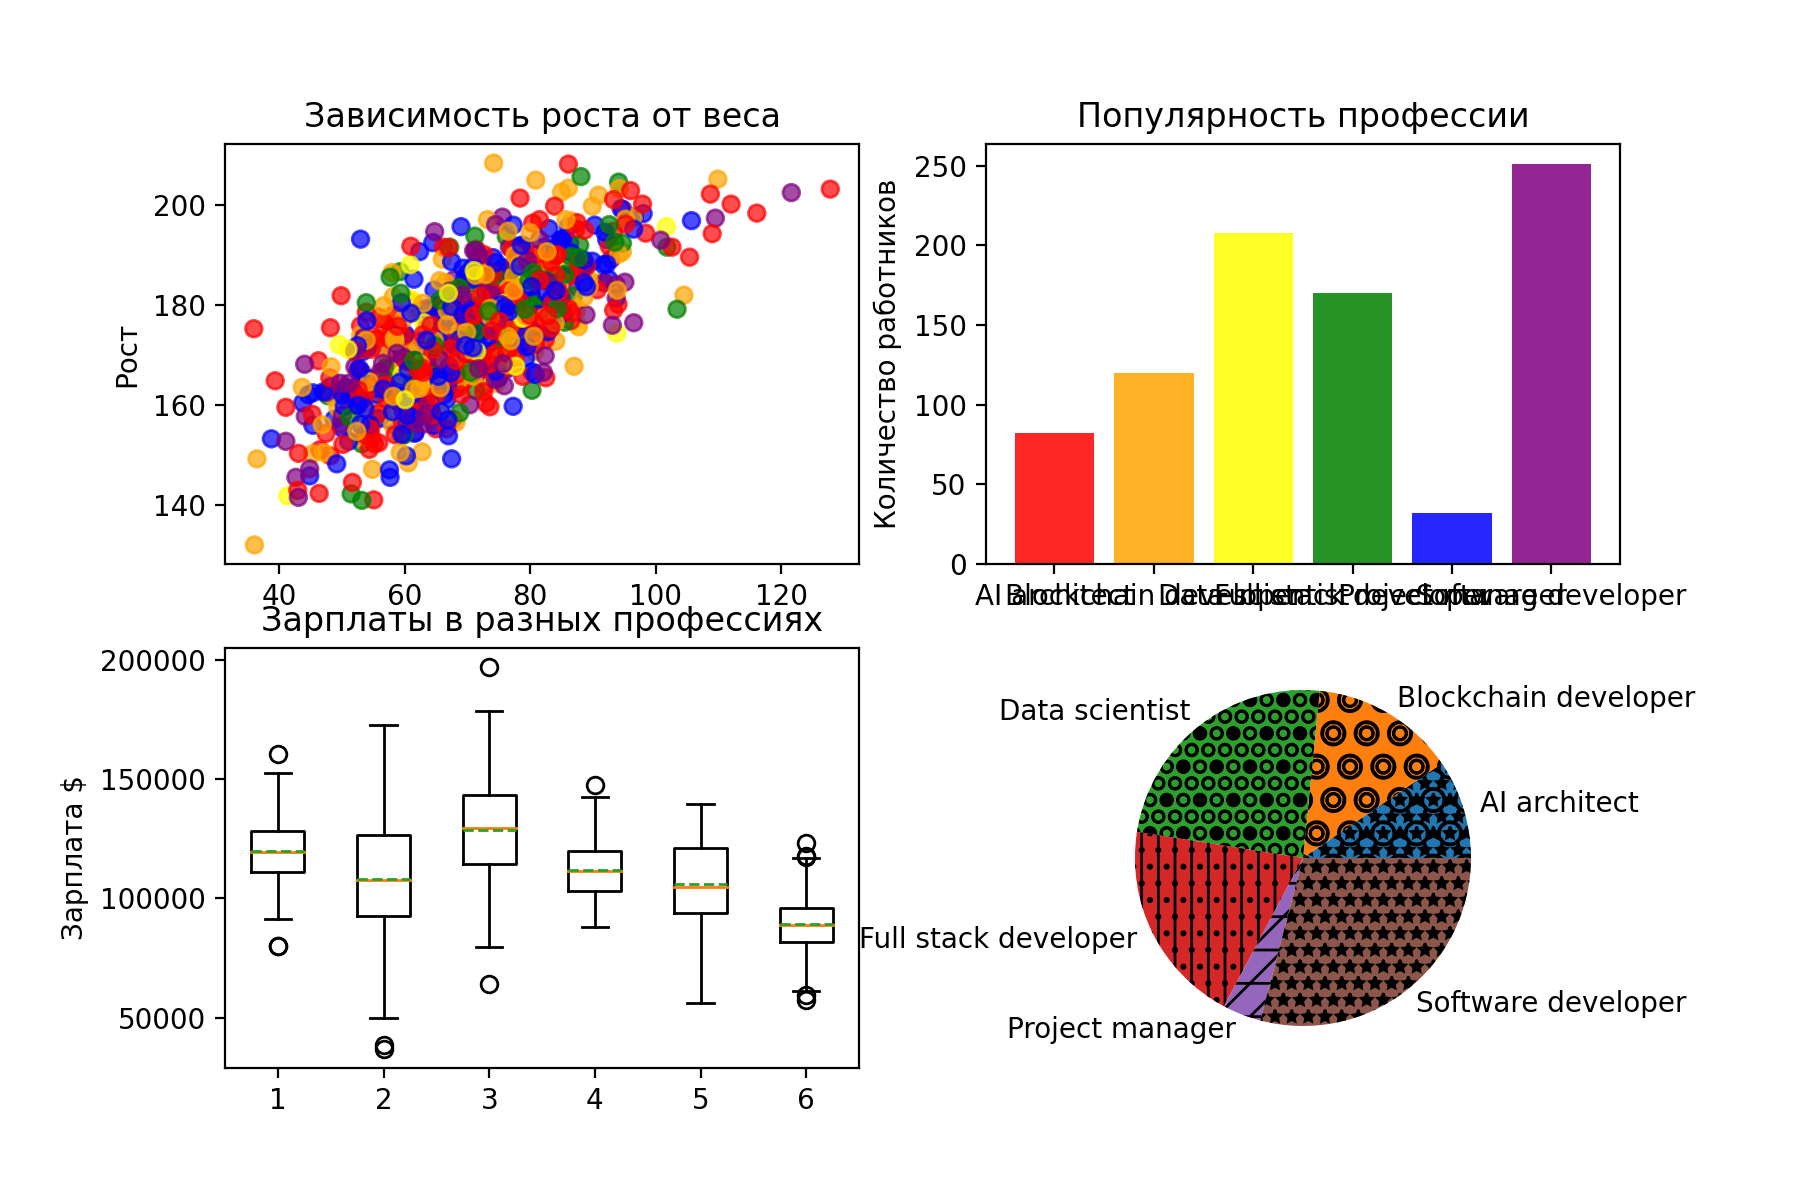

In [12]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(9)
fig.set_figheight(6)

axs[0, 0].scatter(x=df["weight"], y=df["height"], c=jobs_colors[df["job"]], alpha=0.7)
axs[0, 0].set_title("Зависимость роста от веса")
axs[0, 0].set_ylabel("Рост")

bars = axs[0, 1].bar(jobs_counts.index,
                    jobs_counts.values,
                    color=jobs_colors,
                    alpha=0.85)
axs[0, 1].set_ylabel("Количество работников")
axs[0, 1].set_title("Популярность профессии")

axs[1, 0].boxplot(jobs_ser.values, showmeans=True, meanline=True)
axs[1, 0].set_ylabel("Зарплата $")
axs[1, 0].set_title("Зарплаты в разных профессиях")

axs[1, 1].pie(jobs_counts.values, labels=jobs_counts.index, hatch=['**O', 'oO', 'O.O', '.||.', '-//', '**'])


plt.show()

---
## Задачи для самостоятельного выполнения
Дедлайн 10окт23 23:59.

|Вариант 1|Вариант 2|
|:-----------:|:----------:|
|CSV файл по [ссылке](https://raw.githubusercontent.com/toUpperCase78/formula1-datasets/master/Formula1_2023season_raceResults.csv)|CSV файл по [ссылке](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)|
|1. Выбрать один трек (любой) и построить bar plot лучших кругов для каждого гонщика|1. Построить bar plot по количеству выживших в каждом классе|
|2. Построить два графика pie plot (в одном выводе). На одном показать, сколько раз Max Verstappen приходил 1-ым, 2-ым и тд, на втором ту же информацию о Lewis Hamilton|2. Построить два pie plot (в одном выводе) о количестве выживших и не выживших среди мужчин (на одном графике) и женщин (на другом)|
